<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Malm24/blob/main/Actividad_Semanal_6(visualizaci%C3%B3n)_A01113135.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librerias

In [87]:
# Importando librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

##Descarga los datos y carga el dataset en tu libreta


In [6]:
libreria = "/content/default of credit card clients.csv"

In [11]:
df = pd.read_csv(libreria, index_col=0) #leer el csv
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [12]:
df.head(5) 

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [14]:
df.columns = ['amount_credit','gender','education','marital_status','age', #cambiando los nombres de las columnas
              'h_sep', 'h_aug', 'h_jul', 'h_jun', 'h_may', 'h_apl',
              'a_sep', 'a_aug', 'a_jul', 'a_jun', 'a_may', 'a_apl',
               'p_sep', 'p_aug', 'p_jul', 'p_jun', 'p_may', 'p_apl','Y']

In [15]:
df.head(1) #validando el cambio de nombres

,amount_credit,gender,education,marital_status,age,h_sep,h_aug,h_jul,h_jun,h_may,...,a_jun,a_may,a_apl,p_sep,p_aug,p_jul,p_jun,p_may,p_apl,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0


##Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [17]:
df.shape #Consultamos el shape de nuestro df

(30000, 24)

In [18]:
df.columns #Nos muestra el nombre de nuestras columnas

Index(['amount_credit', 'gender', 'education', 'marital_status', 'age',
       'h_sep', 'h_aug', 'h_jul', 'h_jun', 'h_may', 'h_apl', 'a_sep', 'a_aug',
       'a_jul', 'a_jun', 'a_may', 'a_apl', 'p_sep', 'p_aug', 'p_jul', 'p_jun',
       'p_may', 'p_apl', 'Y'],
      dtype='object')

In [19]:
df.dtypes #consultados el tipo de data con el que contamos

amount_credit       int64
gender            float64
education         float64
marital_status    float64
age               float64
h_sep             float64
h_aug             float64
h_jul             float64
h_jun             float64
h_may             float64
h_apl             float64
a_sep             float64
a_aug             float64
a_jul             float64
a_jun             float64
a_may             float64
a_apl             float64
p_sep             float64
p_aug             float64
p_jul             float64
p_jun             float64
p_may             float64
p_apl             float64
Y                 float64
dtype: object

In [22]:
df.info() #nos muestra el número de cada columna, su nombre, datos no-nulos y el tipo de dato

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   amount_credit   30000 non-null  int64  
 1   gender          29999 non-null  float64
 2   education       29998 non-null  float64
 3   marital_status  29998 non-null  float64
 4   age             29995 non-null  float64
 5   h_sep           29997 non-null  float64
 6   h_aug           29995 non-null  float64
 7   h_jul           29993 non-null  float64
 8   h_jun           29991 non-null  float64
 9   h_may           29984 non-null  float64
 10  h_apl           29986 non-null  float64
 11  a_sep           29989 non-null  float64
 12  a_aug           29989 non-null  float64
 13  a_jul           29987 non-null  float64
 14  a_jun           29985 non-null  float64
 15  a_may           29983 non-null  float64
 16  a_apl           29990 non-null  float64
 17  p_sep           29992 non-null 

In [25]:
df.isna().sum().sort_values(ascending=False) #nos ayuda a indentificar la cantidad de valores nulos por columna y los ordena de manera descendente

a_may             17
h_may             16
a_jun             15
h_apl             14
a_jul             13
a_sep             11
a_aug             11
p_jun             11
p_may             11
a_apl             10
h_jun              9
p_aug              9
p_jul              8
p_sep              8
h_jul              7
h_aug              5
age                5
p_apl              5
Y                  3
h_sep              3
marital_status     2
education          2
gender             1
amount_credit      0
dtype: int64

##Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [31]:
maxnulos = df.isna().sum().sum() #nos permite realizar el calculo de datos 

In [32]:
totaldatos=df.shape[0]
totaldatos

30000

In [34]:
p_eliminados = maxnulos/totaldatos*100
p_eliminados

0.6533333333333333

In [36]:
print ("La proporción de datos nulos contra filas existentes es:", p_eliminados, "%")

La proporción de datos nulos contra filas existentes es: 0.6533333333333333 %


Asumiendo que total de datos se encuentran distribuidos en registros/filas distintas si eliminamos 196 filas solo represantan el 0.65% de los datos lo cual no representa un problema para dataset.

In [35]:
dfnonulos = df.copy()

In [38]:
dfnonulos.dropna(axis = 0, inplace = True) #Eliminamos aquellas filas que cuentan con valores nulos
dfnonulos

,amount_credit,gender,education,marital_status,age,h_sep,h_aug,h_jul,h_jun,h_may,...,a_jun,a_may,a_apl,p_sep,p_aug,p_jul,p_jun,p_may,p_apl,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [40]:
dfnonulos.info() #comprobamos que los datos nulos fueron eliminados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   amount_credit   29958 non-null  int64  
 1   gender          29958 non-null  float64
 2   education       29958 non-null  float64
 3   marital_status  29958 non-null  float64
 4   age             29958 non-null  float64
 5   h_sep           29958 non-null  float64
 6   h_aug           29958 non-null  float64
 7   h_jul           29958 non-null  float64
 8   h_jun           29958 non-null  float64
 9   h_may           29958 non-null  float64
 10  h_apl           29958 non-null  float64
 11  a_sep           29958 non-null  float64
 12  a_aug           29958 non-null  float64
 13  a_jul           29958 non-null  float64
 14  a_jun           29958 non-null  float64
 15  a_may           29958 non-null  float64
 16  a_apl           29958 non-null  float64
 17  p_sep           29958 non-null 

##Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [42]:
dfnonulos.describe().T

,count,mean,std,min,25%,50%,75%,max
amount_credit,29958.0,167555.900928,129737.299088,10000.0,50000.00,140000.0,240000.00,1000000.0
gender,29958.0,1.604012,0.489070,1.0,1.00,2.0,2.00,2.0
education,29958.0,1.853094,0.790471,0.0,1.00,2.0,2.00,6.0
marital_status,29958.0,1.551739,0.521952,0.0,1.00,2.0,2.00,3.0
age,29958.0,35.483443,9.214319,21.0,28.00,34.0,41.00,79.0
h_sep,29958.0,-0.017124,1.123989,-2.0,-1.00,0.0,0.00,8.0
h_aug,29958.0,-0.134021,1.197171,-2.0,-1.00,0.0,0.00,8.0
h_jul,29958.0,-0.166767,1.196026,-2.0,-1.00,0.0,0.00,8.0
h_jun,29958.0,-0.221110,1.168419,-2.0,-1.00,0.0,0.00,8.0
h_may,29958.0,-0.266807,1.132307,-2.0,-1.00,0.0,0.00,8.0


Count - nos permite comprobar que existe la misma cantidad de datos para cada variable
Mean - nos 

##Realiza el conteo de las variables categóricas

In [68]:
pd.value_counts(dfnonulos['gender']).sort_index

<bound method Series.sort_index of 2.0    18095
1.0    11863
Name: gender, dtype: int64>

In [69]:
pd.value_counts(dfnonulos['education']).sort_index

<bound method Series.sort_index of 2.0    14009
1.0    10572
3.0     4909
5.0      280
4.0      123
6.0       51
0.0       14
Name: education, dtype: int64>

In [70]:
pd.value_counts(dfnonulos['marital_status']).sort_index

<bound method Series.sort_index of 2.0    15939
1.0    13643
3.0      322
0.0       54
Name: marital_status, dtype: int64>

In [71]:
pd.value_counts(dfnonulos['h_sep']).sort_index

<bound method Series.sort_index of  0.0    14717
-1.0     5680
 1.0     3678
-2.0     2758
 2.0     2662
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
Name: h_sep, dtype: int64>

In [72]:
pd.value_counts(dfnonulos['h_aug']).sort_index

<bound method Series.sort_index of  0.0    15709
-1.0     6042
 2.0     3918
-2.0     3778
 3.0      326
 4.0       99
 1.0       28
 5.0       25
 7.0       20
 6.0       12
 8.0        1
Name: h_aug, dtype: int64>

In [73]:
pd.value_counts(dfnonulos['h_sep']).sort_index

<bound method Series.sort_index of  0.0    14717
-1.0     5680
 1.0     3678
-2.0     2758
 2.0     2662
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
Name: h_sep, dtype: int64>

In [74]:
pd.value_counts(dfnonulos['h_jul']).sort_index

<bound method Series.sort_index of  0.0    15742
-1.0     5930
-2.0     4082
 2.0     3811
 3.0      240
 4.0       76
 7.0       27
 6.0       23
 5.0       21
 1.0        4
 8.0        2
Name: h_jul, dtype: int64>

In [75]:
pd.value_counts(dfnonulos['h_jun']).sort_index

<bound method Series.sort_index of  0.0    16431
-1.0     5681
-2.0     4343
 2.0     3154
 3.0      179
 4.0       69
 7.0       57
 5.0       35
 6.0        5
 1.0        2
 8.0        2
Name: h_jun, dtype: int64>

In [76]:
pd.value_counts(dfnonulos['h_may']).sort_index

<bound method Series.sort_index of  0.0    16925
-1.0     5533
-2.0     4541
 2.0     2618
 3.0      178
 4.0       84
 7.0       57
 5.0       17
 6.0        4
 8.0        1
Name: h_may, dtype: int64>

In [77]:
pd.value_counts(dfnonulos['h_apl']).sort_index

<bound method Series.sort_index of  0.0    16266
-1.0     5731
-2.0     4890
 2.0     2760
 3.0      183
 4.0       49
 7.0       46
 6.0       18
 5.0       13
 8.0        2
Name: h_apl, dtype: int64>

##Escala los datos

In [113]:
dfnonulos_pca = dfnonulos.copy()

In [114]:
dfnonulos_pca.drop(columns = 'gender' , inplace=True) #quitamos categoricas para hacer PCA
dfnonulos_pca.drop(columns = 'education' , inplace=True)
dfnonulos_pca.drop(columns = 'marital_status' , inplace=True)
dfnonulos_pca.drop(columns = 'h_sep' , inplace=True)
dfnonulos_pca.drop(columns = 'h_aug' , inplace=True)
dfnonulos_pca.drop(columns = 'h_jul' , inplace=True)
dfnonulos_pca.drop(columns = 'h_jun' , inplace=True)
dfnonulos_pca.drop(columns = 'h_may' , inplace=True)
dfnonulos_pca.drop(columns = 'h_apl' , inplace=True)
dfnonulos_pca.drop(columns ='Y',inplace=True) 

In [115]:
scaler = StandardScaler() #Definimos variable scaler que almacena el método StandardScaler().
sca_nonulos = scaler.fit_transform(dfnonulos_pca)#scaled va a almacenar los valores de la estandarización de los valores.

In [116]:
sca_nonulos

array([[-1.13736269, -1.24628151, -0.64249667, ..., -0.30810735,
        -0.31412418, -0.29348473],
       [-0.36656147, -1.0292244 , -0.65920548, ..., -0.24431534,
        -0.31412418, -0.18105373],
       [-0.59780183, -0.16099598, -0.29873773, ..., -0.24431534,
        -0.24870184, -0.01240721],
       ...,
       [-1.06028257,  0.16458968, -0.6472202 , ..., -0.0401809 ,
        -0.18327949, -0.11921667],
       [-0.67488196,  0.5987039 , -0.71793741, ..., -0.18524394,
         3.15090487, -0.19207196],
       [-0.90612232,  1.14134666, -0.04505161, ..., -0.24431534,
        -0.24870184, -0.23726923]])

In [117]:
scaleddf_nonulos = pd.DataFrame(sca_nonulos, columns=dfnonulos_pca.columns)

In [119]:
scaleddf_nonulos.head(5)

,amount_credit,age,a_sep,a_aug,a_jul,a_jun,a_may,a_apl,p_sep,p_aug,p_jul,p_jun,p_may,p_apl
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314


##Reduce las dimensiones con PCA:
##1.-Indica la varianza de los datos explicada por cada componente seleccionado.Para actividades de exploración de los datos la varianza > 70%
##2.- Indica la importancia de las variables en cada componente

In [122]:
pcs = PCA() 

In [123]:
pcs_t = pcs.fit_transform(scaleddf_nonulos)
pcs_t[:5]

array([[-1.95861347e+00, -5.36935548e-01,  1.33026326e+00,
        -1.76466173e-01,  1.78476835e-02,  2.77646145e-03,
         1.29010046e-02,  5.80885205e-02,  2.21268695e-01,
         2.02066015e-02,  1.68710287e-02, -3.14858410e-03,
         8.15558569e-03,  9.86538923e-03],
       [-1.73543639e+00, -2.17455383e-01,  8.63894947e-01,
        -2.80889399e-01,  4.94098943e-02, -1.18062416e-01,
         9.91641641e-02,  7.52386637e-02, -2.87026648e-01,
        -7.30485666e-02, -5.57769745e-03,  1.22574823e-02,
        -4.04768371e-03,  7.41830384e-04],
       [-1.22457257e+00, -2.85108665e-01,  2.13127766e-01,
        -7.66632559e-03,  1.26938297e-01, -6.20521778e-02,
        -1.40071875e-02,  8.40632249e-02,  2.82844658e-01,
        -1.60703686e-02,  1.12401687e-01, -8.04550604e-02,
        -4.13466939e-02, -5.71189238e-02],
       [-5.41595290e-01, -6.66646687e-01,  9.76280692e-02,
         2.92571245e-01,  8.85437669e-03,  1.09430096e-01,
        -1.34229136e-01,  6.32182383e-02,  5.

In [124]:
pcsSummary_df = pd.DataFrame({
'% varianza explicada': np.round(pcs.explained_variance_ratio_,4) * 100,
'% varianza acumulada': np.cumsum(pcs.explained_variance_ratio_) * 100
})
pcsSummary_df

,% varianza explicada,% varianza acumulada
0,42.28,42.277891
1,12.26,54.533132
2,7.46,61.997411
3,6.61,68.605797
4,6.31,74.918180
5,6.23,81.152296
6,5.57,86.721112
7,5.19,91.911302
8,5.05,96.963631
9,1.89,98.852509


In [127]:
pcs_labels = [f'PC{i + 1}' for i in range(len(scaleddf_nonulos.columns))] #agregamos etiquetas para PCA
pcsSummary_df.index = pcs_labels
pcsSummary_df

,% varianza explicada,% varianza acumulada
PC1,42.28,42.277891
PC2,12.26,54.533132
PC3,7.46,61.997411
PC4,6.61,68.605797
PC5,6.31,74.918180
PC6,6.23,81.152296
PC7,5.57,86.721112
PC8,5.19,91.911302
PC9,5.05,96.963631
PC10,1.89,98.852509


En este caso observamos que con los primeros 5 PC obtenemos un varianza mayor al 70%

pC1	42.28%	
PC2	12.26%
PC3	7.46%	
PC4	6.61%	
PC5	6.31%	

In [129]:
pcs_df = pd.DataFrame(pcs_t, columns =pcs_labels)
print("Varianza total variables originales: ", scaleddf_nonulos.var().sum())
print("Varianza total de los componentes: ", pcs_df.var().sum())

Varianza total variables originales:  14.000467336515669
Varianza total de los componentes:  14.000467336515666


In [131]:
comps_df = pd.DataFrame(
pcs.components_.round(4), # pcs.components nos da los pesos de cada componente contra las variables originales
columns = pcs_df.columns, 
index = scaleddf_nonulos.columns) 
comps_df.iloc[:,:12]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
amount_credit,0.1655,0.0328,0.3724,0.3833,0.3883,0.3916,0.3885,0.3807,0.1351,0.1168,0.1281,0.1169
age,0.3007,0.0719,-0.1908,-0.1746,-0.1269,-0.1204,-0.1059,-0.0942,0.3832,0.4084,0.3923,0.3496
a_sep,-0.3786,-0.8695,-0.0342,-0.0018,0.0347,0.0341,0.0339,0.0185,0.1738,0.2009,0.1221,0.0623
a_aug,-0.2001,0.3390,-0.0639,0.0076,0.0605,0.0748,0.0396,-0.0706,0.3621,0.3457,0.2447,-0.0947
a_jul,0.0353,-0.0398,0.0414,0.0832,0.1138,0.0284,-0.1068,-0.1650,0.2257,0.1487,-0.2396,-0.5778
a_jun,-0.0789,0.0715,-0.0440,-0.0288,0.0992,0.0145,-0.0993,0.0693,0.0406,0.4084,-0.1082,-0.5008
a_may,0.1112,-0.0788,0.0082,-0.0324,-0.1212,0.1265,-0.0076,0.0079,-0.2016,-0.2788,0.7852,-0.4622
a_apl,-0.0464,0.0274,0.0093,-0.1356,0.0931,0.0392,0.0498,-0.0003,-0.7487,0.5785,0.0682,0.0778
p_sep,-0.8220,0.3303,0.0103,0.0169,-0.0186,0.0191,0.0237,0.0587,0.0199,-0.1107,0.1530,0.0988
p_aug,-0.0292,-0.0090,0.5667,0.3869,0.1229,-0.2053,-0.4200,-0.4889,-0.0566,0.0509,0.1449,0.1241


Si nos concentramos en los primeros 5 PC podemos observar que las variables mas importantes para cada uno son:

-PC1 - p_sep
-PC2 - a_sep
-PC3 - p_aug
-PC4 - p_apl
-PC5 - p_jun

##Histogramas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5a4798b90>,
      dtype=object)

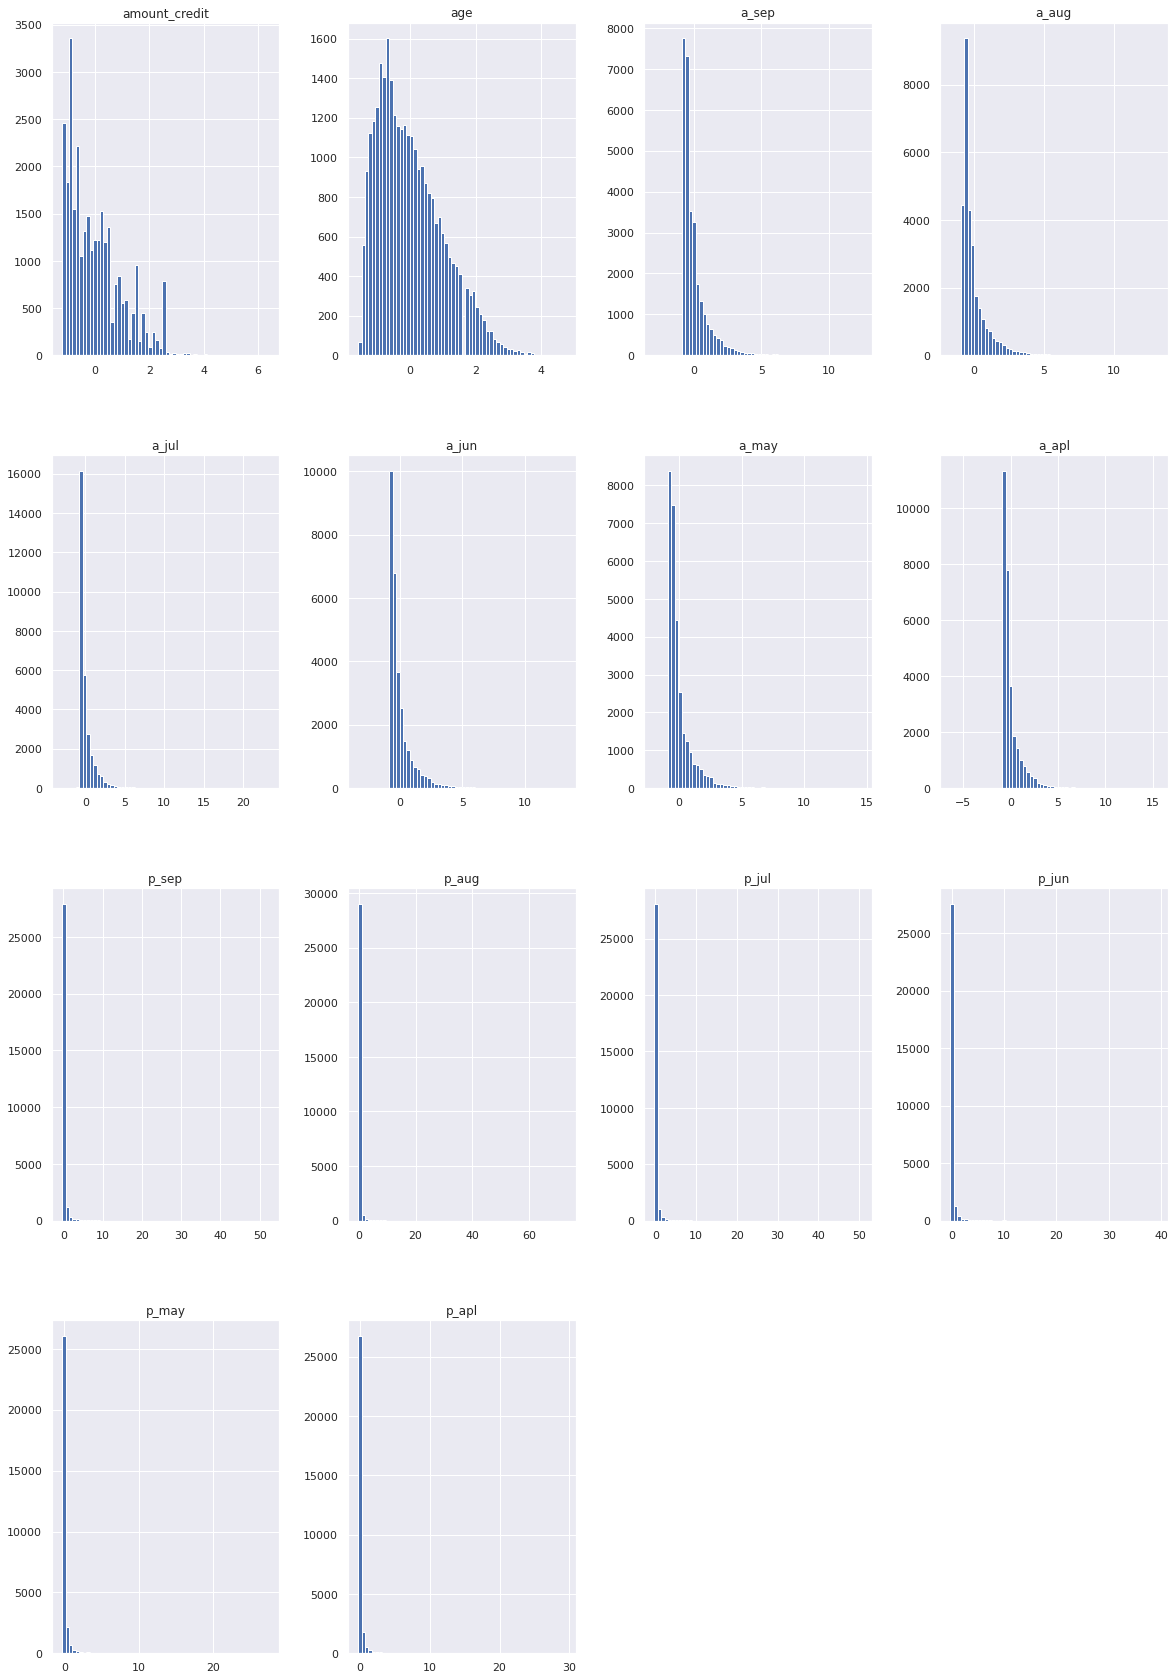

In [137]:
scaleddf_nonulos.hist(bins = 60, figsize=(20,30))

Por medio de los histogramas podemos observar el comportamiento que parecen estar sesgados a la derecha.

##Visualización

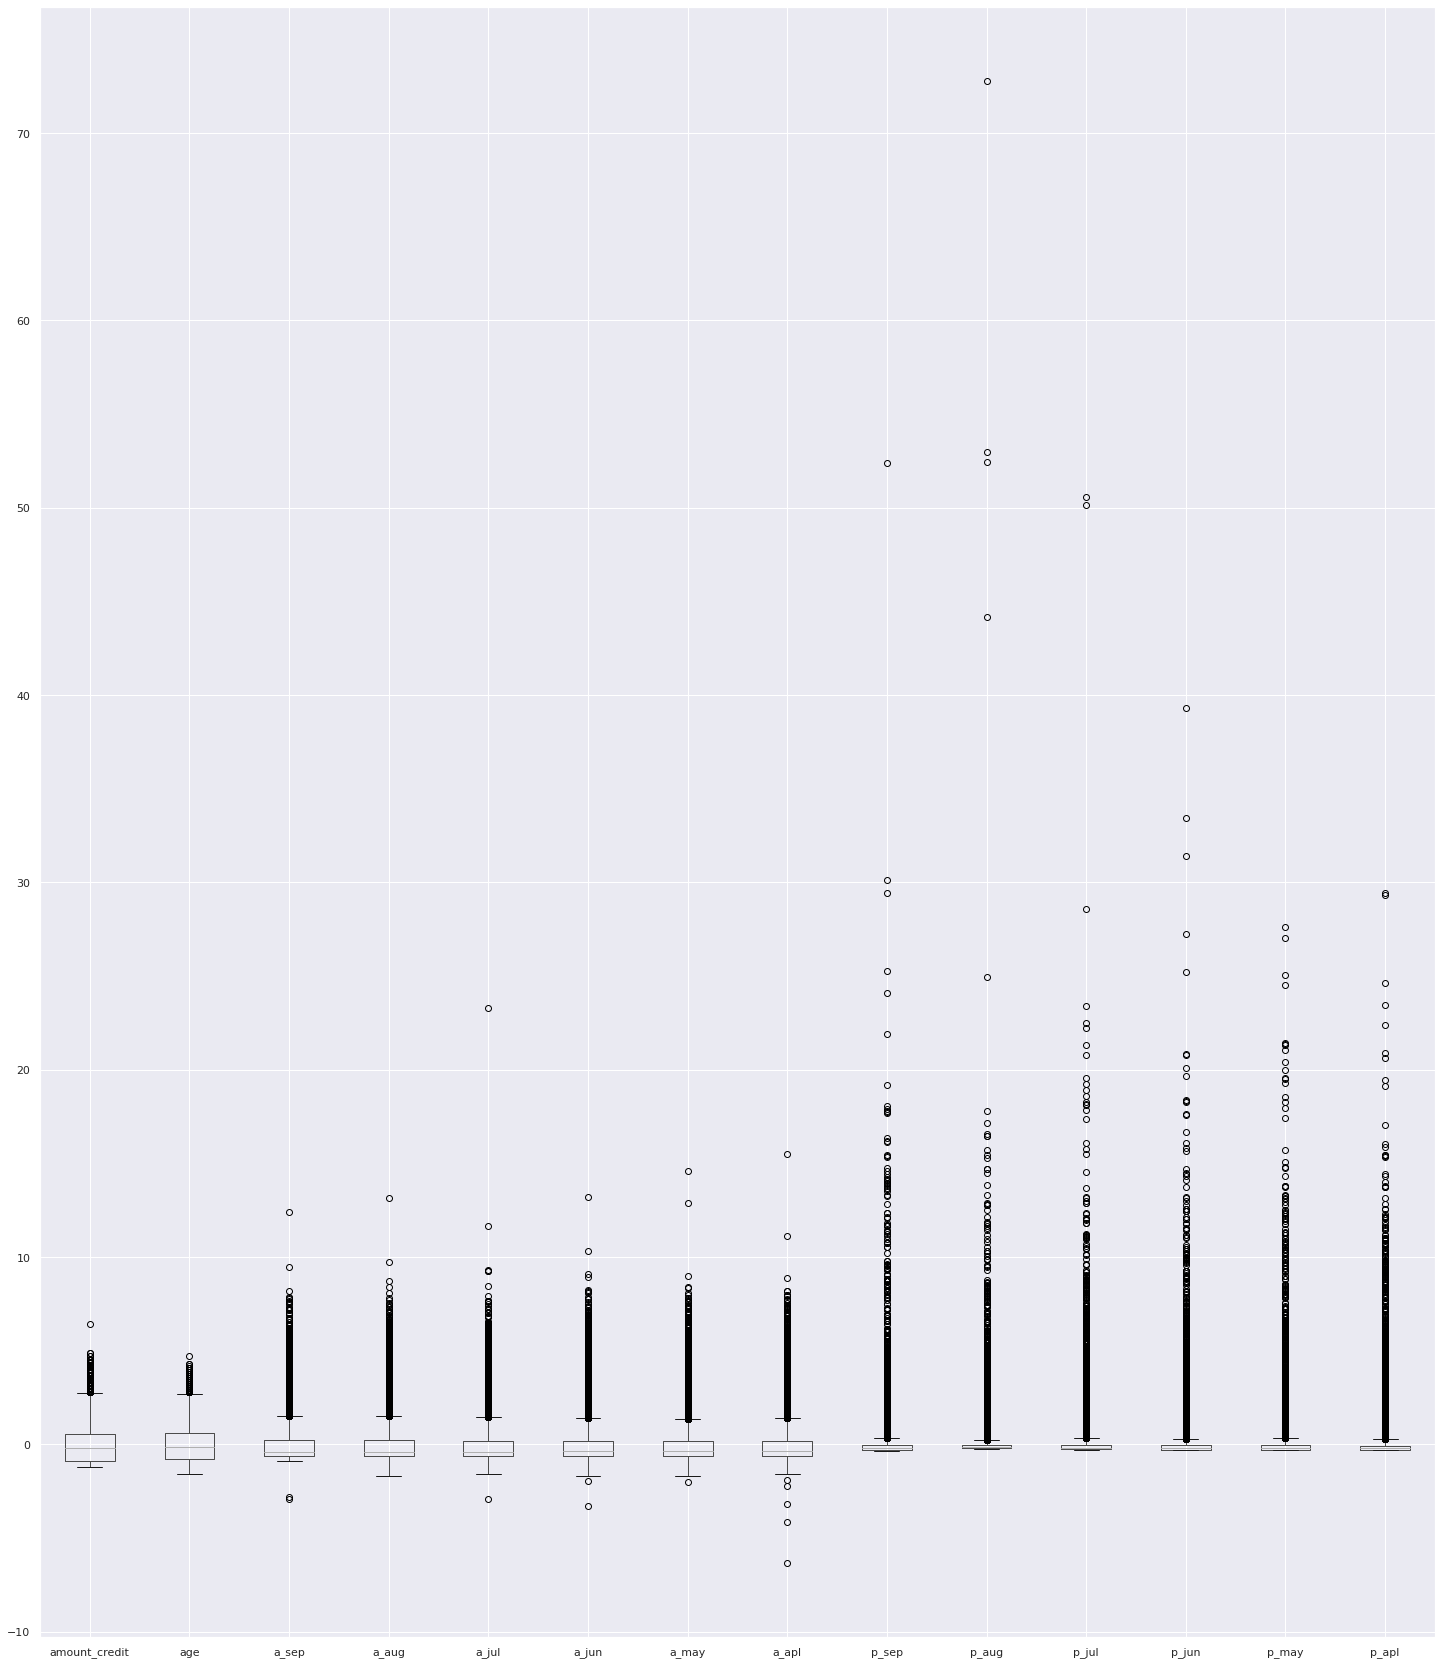

In [139]:
scaleddf_nonulos.boxplot()

Como podemos observar en este gráfico las diagramas de caja se encuentran centradas al cero. Esto debido a que toda las variables númericas graficadas se encuentran normalizadas. Tambien podemos darnos cuenta de que existe una cantidad considerable de datos atipicos y normalmente estos se encuentran por encima del cuarto cuartil. 

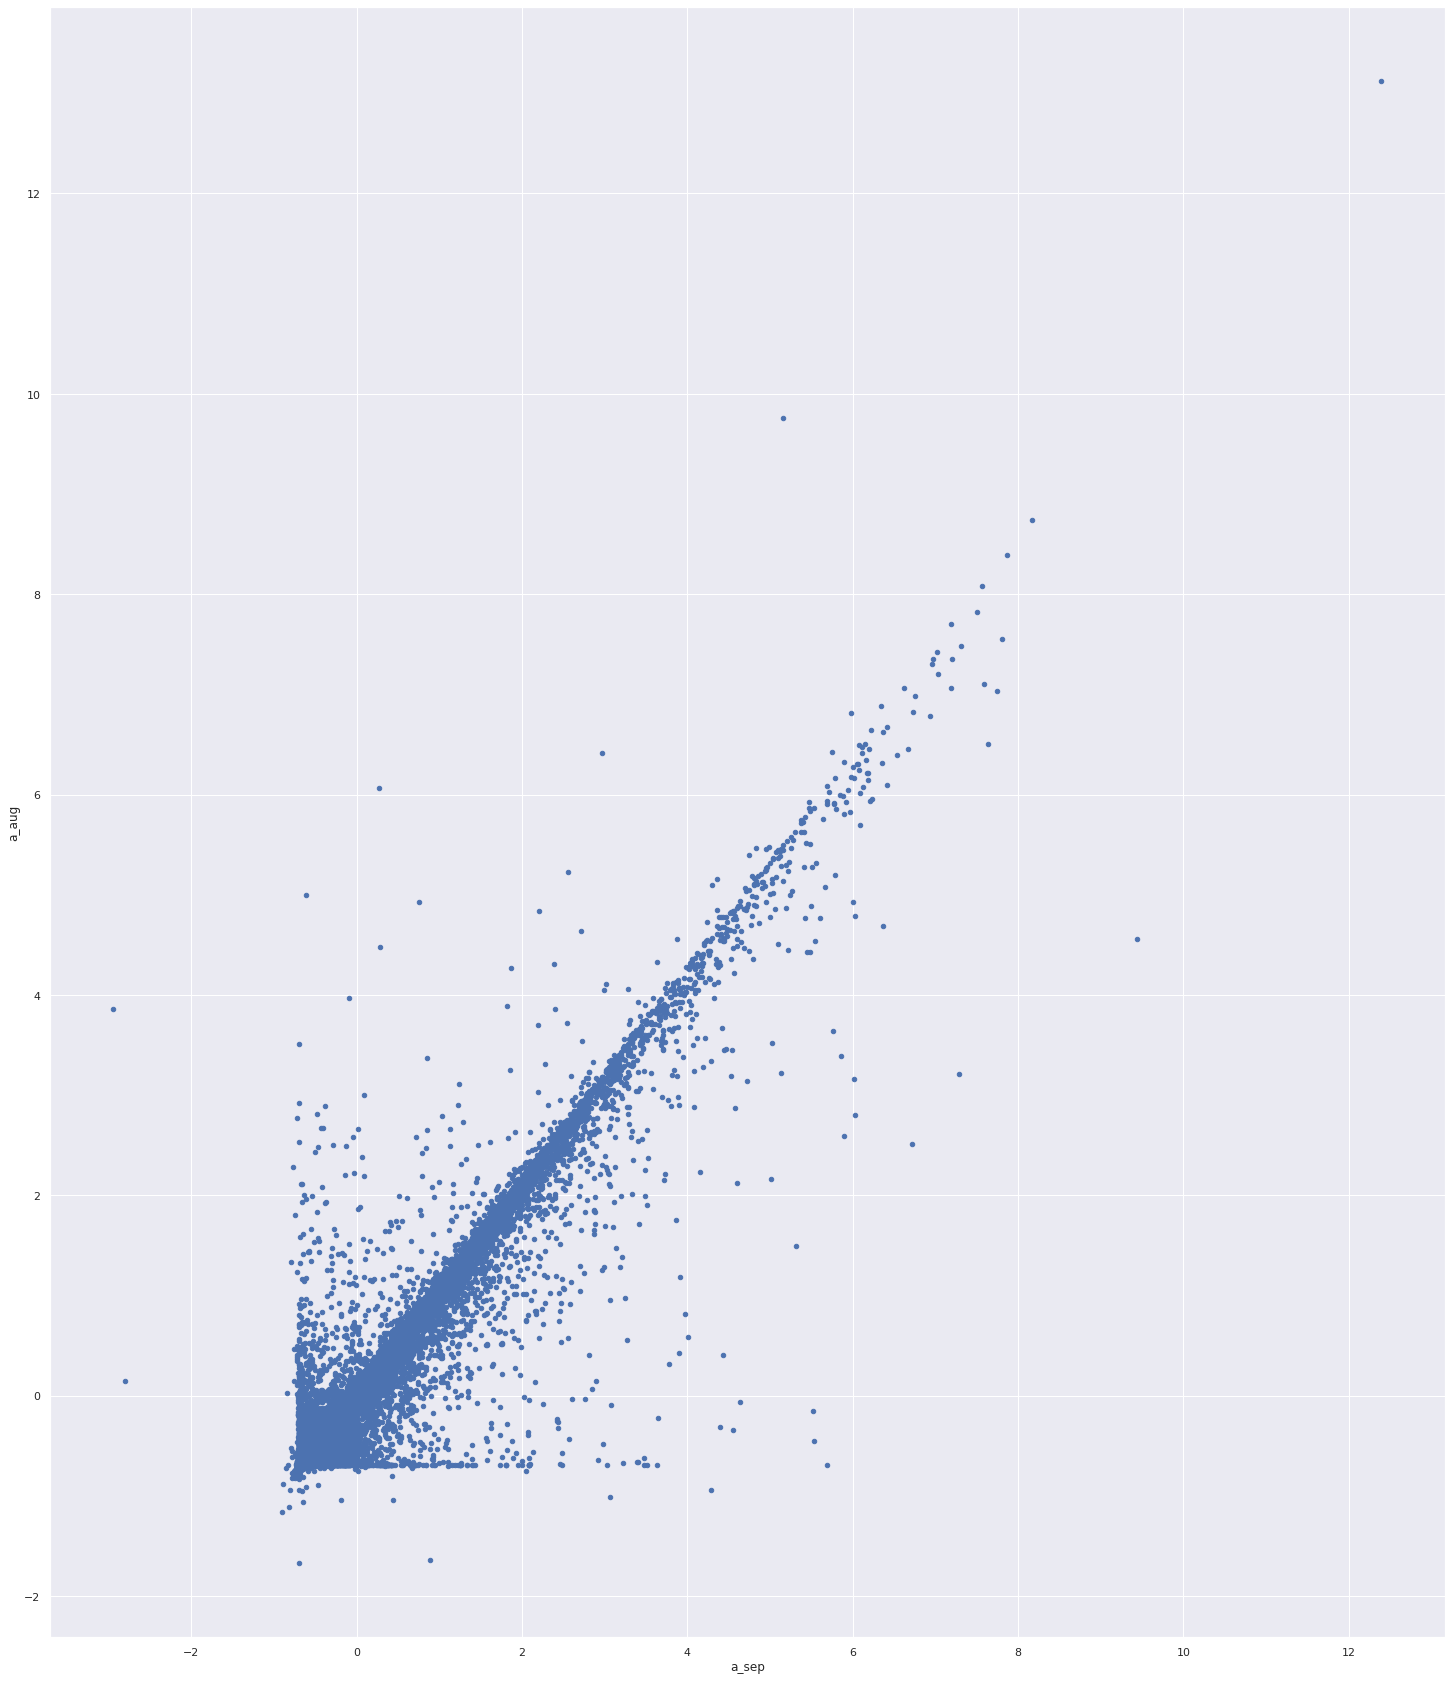

In [156]:
scaleddf_nonulos.plot.scatter(x = "a_sep", y="a_aug")

Si observamos este Scatter Plot nos podemos dar cuenta que al graficar la observaciones de a_sep y a_aug identificamos una correlación lineal pues aumentan en una relación similar.

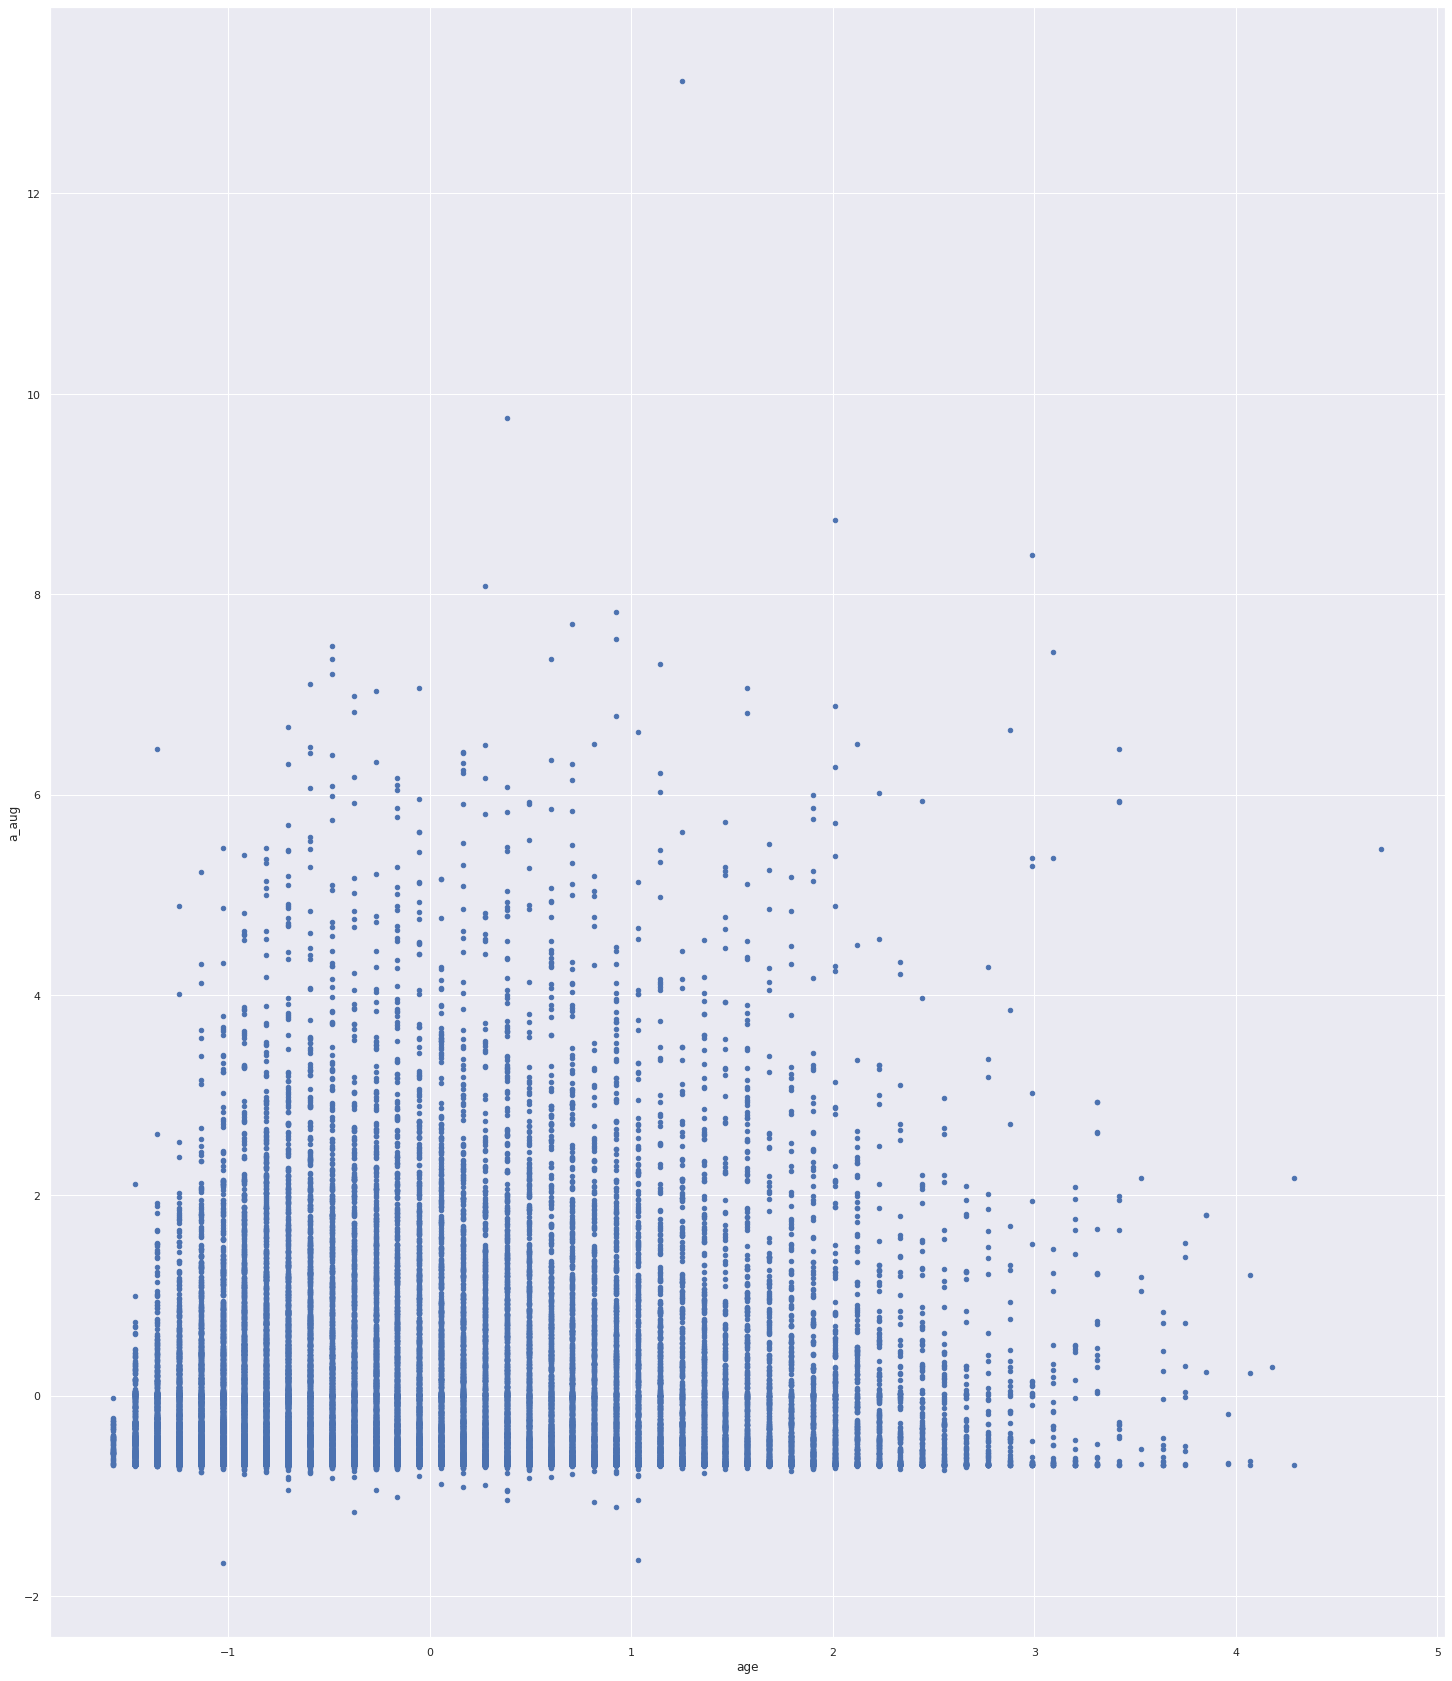

In [157]:
scaleddf_nonulos.plot.scatter(x = "age", y="a_aug")

Si observamos este Scatter Plot nos podemos dar cuenta que al graficar la observaciones de age y a_aug podríamos concluir que no existe una relación lineal pues su nos entrega un gráfico.

##Interpretación y explicación